# Labelled Predictions Analysis

In [1]:
import os
import json
import pandas as pd
import numpy as np

import config
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
attribute_names = ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 
                       'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 
                       'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
                       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 
                       'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
                       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 
                       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']

In [3]:
def read_pred_accuracy_json(tpfile):
    all_accs = pd.DataFrame(index = attribute_names)
    all_accs.index.name = "Attributes"
    for dirt in os.listdir(config.INFERENCE_DIR):
        dirpath = os.path.join(config.INFERENCE_DIR, dirt)
        if os.path.isdir(dirpath): 
            for run in os.listdir(dirpath):
                runpath = os.path.join(dirpath, run)
                if os.path.isdir(runpath): 
                    for filename in os.listdir(runpath):
                        if filename == tpfile:
                            tpfile_path = os.path.join(runpath,tpfile)
                            tpjson = json.load(open(tpfile_path))
                            acc = pd.DataFrame.from_dict(tpjson, orient='index', columns=[run])
                            acc.index.name = "Attributes"
                            all_accs = all_accs.merge(acc, left_index=True, right_on="Attributes")
    return all_accs
                        
    
all_test_accs = read_pred_accuracy_json("test_preds.json") # val_preds.json
all_test_accs 

,20201017_020739,20201016_014917,20201018_100345,20201016_210254
Attributes,,,,
5_o_Clock_Shadow,94.885282,94.935377,94.830177,94.795111
Arched_Eyebrows,84.049694,84.350266,84.199980,84.260094
Attractive,83.248172,83.223124,83.343352,83.147981
Bags_Under_Eyes,85.682797,85.357179,85.287045,85.682797
Bald,98.988077,99.043182,99.043182,99.023144
Bangs,96.177738,96.277928,96.312995,96.227833
Big_Lips,72.071937,72.061918,71.886585,71.781385
Big_Nose,84.670875,84.440437,84.365294,84.710951
Black_Hair,90.481916,90.572087,90.401763,90.577096


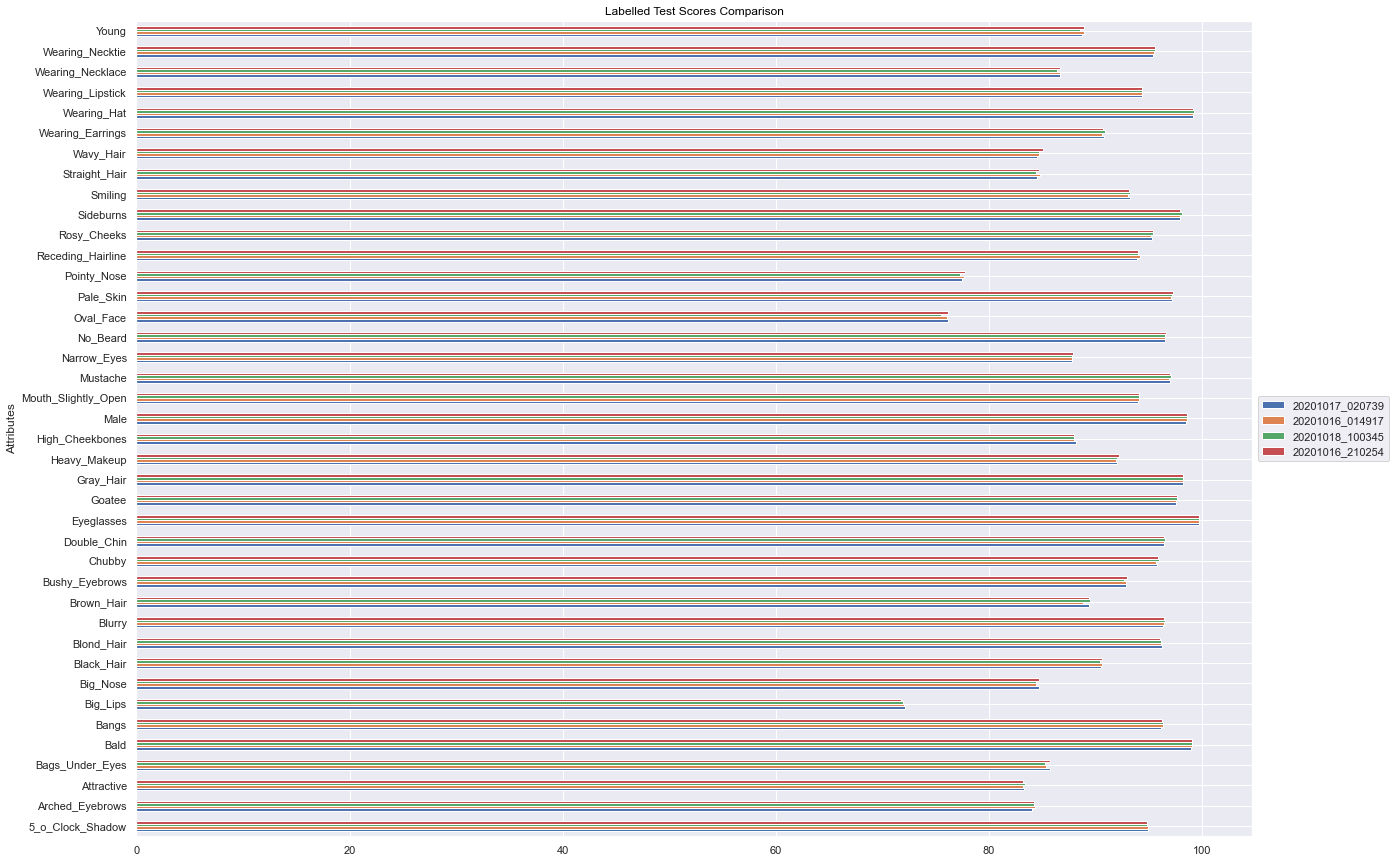

In [6]:
f = plt.figure()
plt.title('Labelled Test Scores Comparison', color='black')
all_test_accs.plot(kind='barh', figsize=(20, 15), ax=f.gca())
# for p in f.gca().patches:
#     value = round(p.get_width(),2)
#     f.gca().annotate(str(value), xy=(p.get_width(), p.get_y()))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Select the best model prediction based on all high scoring models
+ Inspired by Ensemble methods, BUT NOT USING ENSEMBLE PREDICTIONS FOR SUBMISSION!
+ Create a most commonly predicted attributes dataframe based on median of all model predictions
+ Compare all model predictions differences between most common predicted and choose the predictions with the lowest differences i.e. generally predicted the same attributes as the other models.

In [7]:
pfile = "predictions.csv"
all_preds = []
for dirt in os.listdir(config.INFERENCE_DIR):
    dirpath = os.path.join(config.INFERENCE_DIR, dirt)
    if os.path.isdir(dirpath): 
        for filename in os.listdir(dirpath):
            if filename == pfile:
                pfile_path = os.path.join(dirpath,pfile)
                print(pfile_path)
                pred = pd.read_csv(pfile_path, index_col=0)
                all_preds.append((pred, dirt))
                #print(pred)
print(f"{len(all_preds)} predictions loaded.")

inf\FaceAttrMobileNetV2_50_42_s0e80_tb128_vb128_FL_SGD_41_lr0.01_wd0.0001_ReduceLROnPlateau\predictions.csv
inf\FaceAttrResNet50_42_s0e80_tb128_vb128_FL_SGD_38_lr0.01_wd0.0001_ReduceLROnPlateau\predictions.csv
inf\FaceAttrResNet_50_42_s0e80_tb128_vb128_CELS_SGD_46_lr0.01_wd0.0001_ReduceLROnPlateau\predictions.csv
inf\FaceAttrResNet_50_42_s0e80_tb128_vb128_FL_SGD_40_lr0.01_wd0.0001_ReduceLROnPlateau\predictions.csv
4 predictions loaded.


In [8]:
all_preds[1][0]
#all_preds[1][0].loc['Aaron_Eckhart_0001.jpg', '5_o_Clock_Shadow'] = 1

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
Images,,,,,,,,,,,,,,,,,,,,,
Aaron_Eckhart_0001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
Aaron_Guiel_0001.jpg,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
Aaron_Patterson_0001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Aaron_Peirsol_0001.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,-1,-1,-1,-1,1,1
Aaron_Peirsol_0002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zorica_Radovic_0001.jpg,-1,-1,-1,1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Zulfiqar_Ahmed_0001.jpg,-1,-1,-1,-1,-1,-1,-1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Zumrati_Juma_0001.jpg,-1,-1,-1,-1,-1,-1,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


In [9]:
def get_most_common_predictions(all_preds):
    most_common_pred = pd.DataFrame(index=all_preds[0][0].index)

    for column in attribute_names:
        column_data = []
        for i in range(len(all_preds)):
            column_data.append(all_preds[i][0][column])
        most_common_pred[column] = np.median(column_data, axis=0)
    return most_common_pred

most_common_pred = get_most_common_predictions(all_preds)

In [12]:
def get_highest_scoring_prediction_id(all_preds, most_common_pred):
    pred_diffs = {}
    for mpred, model in all_preds:
        diff_df = most_common_pred.compare(mpred, align_axis=0)
        pred_diffs[model] = np.sum(diff_df.count()) // 2
    print(pred_diffs)
    return min(pred_diffs, key=pred_diffs.get)

print(f"Most common predictions model: {get_highest_scoring_prediction_id(all_preds, most_common_pred)}")

{'FaceAttrMobileNetV2_50_42_s0e80_tb128_vb128_FL_SGD_41_lr0.01_wd0.0001_ReduceLROnPlateau': 19883, 'FaceAttrResNet50_42_s0e80_tb128_vb128_FL_SGD_38_lr0.01_wd0.0001_ReduceLROnPlateau': 16631, 'FaceAttrResNet_50_42_s0e80_tb128_vb128_CELS_SGD_46_lr0.01_wd0.0001_ReduceLROnPlateau': 20044, 'FaceAttrResNet_50_42_s0e80_tb128_vb128_FL_SGD_40_lr0.01_wd0.0001_ReduceLROnPlateau': 15537}
Most common predictions model: FaceAttrResNet_50_42_s0e80_tb128_vb128_FL_SGD_40_lr0.01_wd0.0001_ReduceLROnPlateau
